# Solution to Kaggle Problem 'House Prices: Advanced Regression Techniques'

***

**Name：AI-23**

**Submission Date：11-01-2018**

***

# Abstract

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. In this dataset the problem is to predict the price of a house based on the 79 given features. 

The main purpose of solving this problem are:
Doing creative featutre engineering
* Doing creative feature engineering
* Using Taditional model using Sckit Learn and Deep model using Keras

# Neural Network Approach

Since Neural network can predict both linear and non linear function between the feauture variables and the target variable , it is used to predict the house price in this problem. In the  [first approach](#f) the most simplest approach is followed. All the missing data of numeric collumns were replaced by their mean and missing values of the categorical variable of their maximum occurred values. In the [second approach](#s) another approach of feauture engineeing and realm of Hyper parameter optimization is explored. 

<a id="f"></a>
### First Approach

Importing all the necessary libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.feature_selection import SelectKBest
import warnings
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import metrics
warnings.filterwarnings('ignore')
%matplotlib inline

Reading the training (learining) and test data. 

In [7]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Data Preprocessing

Drawing correlation matrinx and taking the best 40 feature on the basis of correlation with the target variable 'SalePrice'.

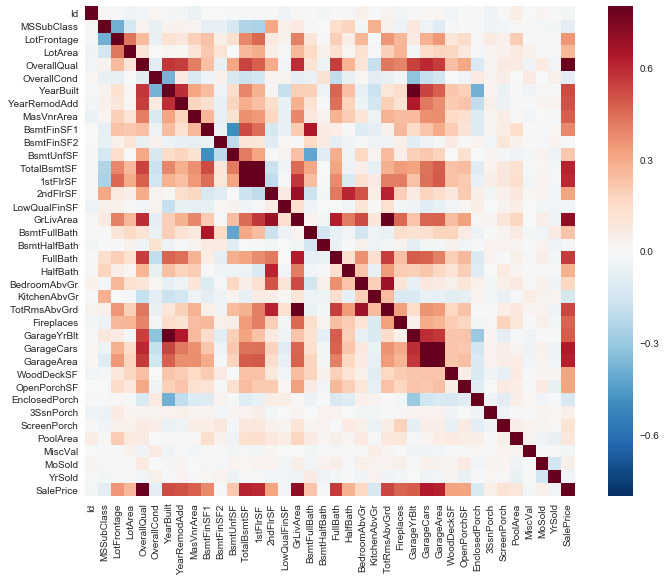

In [8]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
#saleprice correlation matrix
k = 40 #number of variables for to be put into this model
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
train_df=train_df[list(cols)]
test_df=test_df[cols.drop('SalePrice')]

Handliing missing values of the training data and doing decimal encoding on the object type variables with the help of LabelEncoder package.

In [9]:
#Handling Missing values
train_df = train_df.fillna(train_df.mean())

categoric_feats = train_df.dtypes[train_df.dtypes == "object"].index.tolist()

for item in list(categoric_feats):
    train_df[item]=train_df[item].fillna(train_df[item].dropna().max())
    train_df[item] = LabelEncoder().fit_transform(train_df[item])
    
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data #Checking if there exist any more missing values in the training data

,Total,Percent
KitchenAbvGr,0,0.0
YearBuilt,0,0.0
WoodDeckSF,0,0.0
LotFrontage,0,0.0
BsmtFinSF1,0,0.0
Fireplaces,0,0.0
MasVnrArea,0,0.0
GarageYrBlt,0,0.0
YearRemodAdd,0,0.0
TotRmsAbvGrd,0,0.0


Doing same treatment on test data

In [10]:
#Handling Missing values
test_df = test_df.fillna(test_df.mean())

for item in categoric_feats:
    test_df[item]=test_df[item].fillna(test_df[item].dropna().max())
    test_df[item] = LabelEncoder().fit_transform(test_df[item])
    

total = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
KitchenAbvGr,0,0.0
OpenPorchSF,0,0.0
WoodDeckSF,0,0.0
LotFrontage,0,0.0
BsmtFinSF1,0,0.0
Fireplaces,0,0.0
MasVnrArea,0,0.0
GarageYrBlt,0,0.0
YearRemodAdd,0,0.0
YearBuilt,0,0.0


Doing normalization of different variables

In [12]:
X_train=train_df.drop('SalePrice',axis=1).values
y_train=train_df['SalePrice'].values

X_test=test_df.values

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

Training the neural network model with some manually set parameters. (No hyper parameter optimization is not done here. Hyperparameter optimization is done in the [second approach](#s) on the neural network model)

In [13]:
clf = MLPRegressor(max_iter = 500, solver='lbfgs', hidden_layer_sizes = (50,50,50), activation='relu')
clf.fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)
pred_df = pd.DataFrame(y_pred, index=test_df["Id"], columns=["SalePrice"])
pred_df.to_csv('output.csv', header=True, index_label='Id')

#### Kaggle Score

Screen Shot of the Kaggel Score. (This screenshot was taken after obtaing best result at Third Approach)

![Submission Score](0thapproach.png)

<a id="s"></a>
### Second Approach

In this approach The skewness in the traget variable 'SalePrice' is observed and it is corrected accordingly. Moreover, Hyper parameter of the 'MLPRegressor' are optimized using GridsearchCV and all the missing values are filled with a scalar value so that these values are considered as a separate class of itself.

##### Importing important libraries

In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

Reading Training and Test data. Setting Seed for reproducibility. 

In [121]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
train_ID = train_df['Id']
test_ID = test_df['Id']
seed = 0
np.random.seed(seed)
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
y_train = train_df.SalePrice.values
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))
print(train_df.shape,test_df.shape)

all_data size is : (2919, 80)
(1460, 81) (1459, 80)


Handling and Checking Missing Data

In [122]:
all_data = all_data.fillna(0)
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
YrSold,0,0.0
YearRemodAdd,0,0.0
ExterCond,0,0.0
ExterQual,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
Fence,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Foundation,0,0.0


Converting some numeric variable into categorical variable which are categorical in their nature. 

In [123]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype('category')
all_data['OverallCond'] = all_data['OverallCond'].astype('category')
all_data['YrSold'] = all_data['YrSold'].astype('category')
all_data['MoSold'] = all_data['MoSold'].astype('category')

Label encoding all the categorical variable

In [124]:
categoric_feats = list(all_data.dtypes[all_data.dtypes == "object"].index)
for items in categoric_feats:
    all_data[items]=all_data[items].astype('category').cat.codes
len(categoric_feats)
all_data.dtypes.unique()

array([dtype('int64'), dtype('int8'), dtype('float64'), category], dtype=object)

In [125]:
all_data.drop(['Id'], axis=1, inplace=True)
train_data = all_data[:ntrain]
test_data = all_data[ntrain:]
print(train_data.shape,test_data.shape)

(1460, 79) (1459, 79)


In [126]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(train_data)
X_test_scaled=scaler.fit_transform(test_data)
y_train=np.log(y_train)

In [127]:
ann=MLPRegressor(hidden_layer_sizes=(40,20,10),max_iter=1000,verbose=False)
param_grid={'activation':['relu','identity'],
            'solver':['lbfgs','adam'],
            'learning_rate':['constant','adaptive'],
            'alpha':[0.0001],
            'tol':[.0001]}
#grid = GridSearchCV(ann, param_grid, cv=5, scoring=make_scorer(mean_squared_error),n_jobs = -1)
grid = GridSearchCV(ann, param_grid, cv=10, scoring='r2')

grid.fit(X_train_scaled,y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.838697713492
{'activation': 'identity', 'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'lbfgs', 'tol': 0.0001}
MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [128]:
test_y_grid = pd.DataFrame()
test_y_grid['Id'] = test_ID
test_y_grid['SalePrice'] = np.exp(grid.predict(X_test_scaled))
test_y_grid.to_csv('Kaggle_submission_1st_approach.csv',index=0)

#### Kaggle Score

Screen Shot of the Kaggel Score. (This screenshot was taken after obtaing best result at Third Approach)

![Submission Score](best_1st_approac_dropping_ID.png)

<a id="t"></a>
### Third Approach

In this approach, extensive feature engineering is done by handling outliars, standardizing the skewed target and feature variables, understanding the missing value problems and solving them according to the given data description and by label encoding the categorical variables. These steps are given below.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import check_random_state
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


Reading Data and droping 'Id' collumn

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_ID = train['Id']
test_ID = test['Id']
#Dropping the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
#checking the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


#### Outlier Handling

Now we observe if the target variable 'SalePrice' has any outliers. 

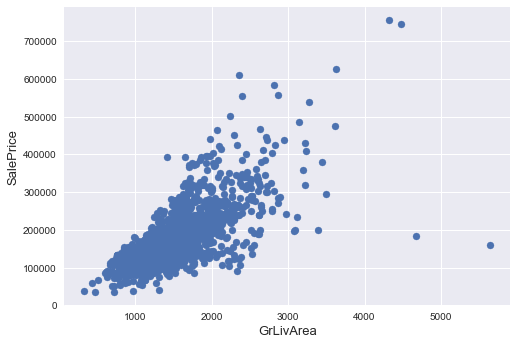

In [3]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

We see in the lower right corner probably there lies two outliers and we will delete them.

In [4]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

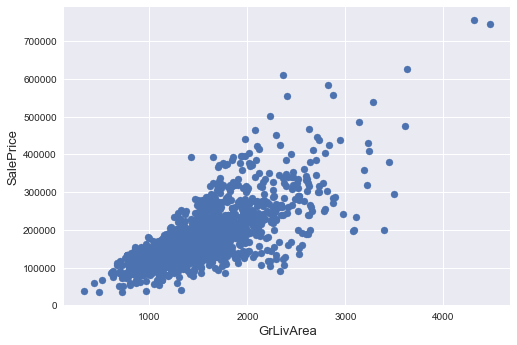

In [5]:
#Checking the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

There may exist other outliers in other feature variables but deleting them will affect the test result if the test data also have outliers. So we will keep them as they are.

#### Standardizing the target variable 'SalePrice'

We will plot the 'SalePrice' distribution and probability plot and see if there exist any skewness compared to the fitted normal distribution.


 mu = 180932.92 and sigma = 79467.79



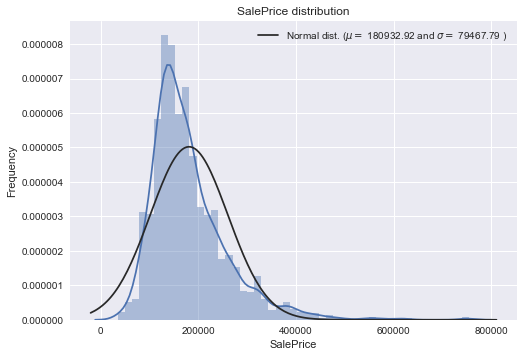

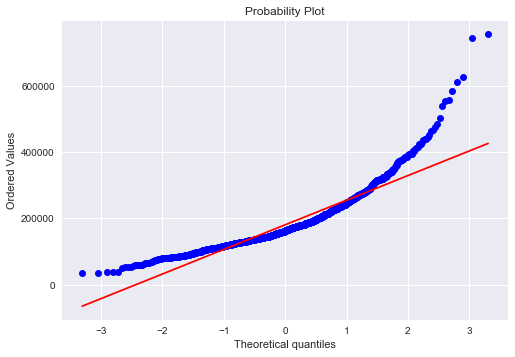

In [6]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

Now the target variable 'SalePrice' is transformed through 'logp1' method provided in numpy library and then its skewness is checked again.


 mu = 12.02 and sigma = 0.40



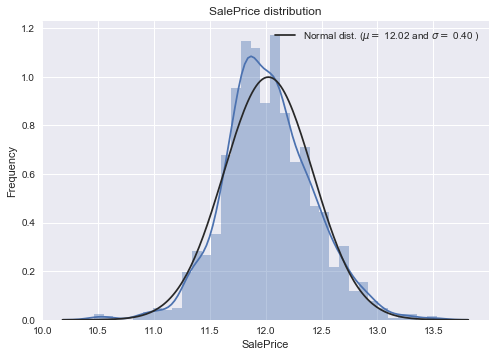

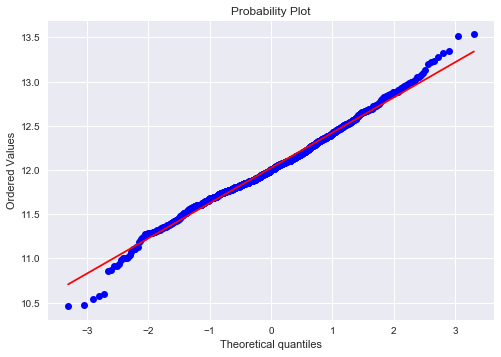

In [7]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#### Handliing Missing Data

First, We check the missing values in both traning and test data. 

In [8]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

all_data size is : (2917, 79)


,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


From the data description it can be seen that for some feature variable 'NA' pandas' code for missing values actually specify a particular value of that categorical variable. From the data description,
* PoolQC: NA means "No Pool".
* MiscFeature: NA means "no misc feature"
* Alley : NA means "no alley access"
* Fence : NA means "no fence"
* FireplaceQu : NA means "no fireplace"
* LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood
* GarageType, GarageFinish, GarageQual and GarageCond : Since No garage = no cars in such garage Replacing missing data with 0 
* smtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
* BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
* MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
* MSZoning : FIlled with the most common value 'RL'
* Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it
* Functional : NA means typical 
* Electrical : Its one missing value is filled with most appeared value 'SBrkr'
* KitchenQual: Its one missing value is filled with most common value 'TA' 
* Exterior1st and Exterior2nd : Their respective single values are filled with the most commmon values.
* SaleType : Miising value are filled with most common value "WD"
* MSSubClass : Na most likely means No building class. We can replace missing values with None

In [9]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
#Check remaining missing values if any 
all_data = all_data.fillna(0)
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
YrSold,0,0.0
Foundation,0,0.0
ExterCond,0,0.0
ExterQual,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
Fence,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
FullBath,0,0.0


Then some numerical values those are essentially are of categorical nature, their type are changed.

In [10]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype('category')
all_data['OverallCond'] = all_data['OverallCond'].astype('category')
all_data['YrSold'] = all_data['YrSold'].astype('category')
all_data['MoSold'] = all_data['MoSold'].astype('category')

Label Encoding some categorical variables that may contain information in their ordering set

In [11]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    all_data[c] = LabelEncoder().fit_transform(all_data[c])
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


An extra feature which is seemingly important is added to the dataframe.

In [12]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']


#### Standardizing skewed feature variables 

We first skewedness in the feature variables and those feature variables whose skewdness is geater than 0.75 are standardized through the Box Cox transformation. 

In [13]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


Box Cox Transformation of (highly) skewed features

In [14]:
skewness = skewness[abs(skewness) > 0.75]

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)
    


Converting Rest categorical variables by label encoding

In [15]:
categoric_feats = list(all_data.dtypes[all_data.dtypes == "object"].index)
for items in categoric_feats:
    all_data[items]=all_data[items].astype('category').cat.codes
print(all_data.shape)

(2917, 79)


#### Normalizing Data

Separating the training and tets data, they are normalized with the StandardScaler method

In [16]:
train_data = all_data[:ntrain]
test_data = all_data[ntrain:]
print(train_data.shape,test_data.shape)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(train_data)
X_test_scaled=scaler.fit_transform(test_data)

(1458, 79) (1459, 79)


#### Decission of algorithm and hyper parameter

Since neural network can prdict both linear and non linear realtion between the feature variables and target variables the 'MLPRegressor' model from sickit learn is used here to predic the target variable 'Saleprice'. The hidden layer node number are set byy an hand rule like the node number of the first hidden layer is half of the input node number and setting the node number of the following layer by halh of the previous layer node number. The hyper parameter like 'activation','solver', 'learning_rate', 'alpha' are tuned through GridSearchCV.  

In [20]:
ann=MLPRegressor(hidden_layer_sizes=(40,20,10),max_iter=1000,verbose=False)
param_grid={'activation':['relu','identity'],
            'solver':['lbfgs','adam'],
            'learning_rate':['constant','adaptive'],
            'alpha':[0.0001],
            'tol':[.0001]}

grid = GridSearchCV(ann, param_grid, cv=10, scoring='r2')

grid.fit(X_train_scaled,y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.902743039301
{'activation': 'identity', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'tol': 0.0001}
MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 20, 10), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [21]:
y_test = pd.DataFrame()
y_test['Id'] = test_ID
y_test['SalePrice'] = np.expm1(grid.predict(X_test_scaled))
y_test.to_csv('ann_submission.csv',index=0)


### Kaggle Score

Screen Shot of the Kaggle score obtained for this model

![Submission](3rdApproach_ann_best_score.png)

### Convolution Neural Network

In this approach, the previously preprocessed data is given to the an CNN network. 

#### Importing Libraries

In [17]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, Conv1D
from keras.layers.convolutional import MaxPooling2D,MaxPooling1D
from keras.utils import np_utils
from keras.layers import Embedding
from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


Defining the CNN architechture

In [18]:
def CNN(train_x_scaled_sample):
    model = Sequential()
    model.add(Conv1D(200, 1,strides=1, activation='relu', input_shape=(1,train_x_scaled_sample.shape[1])))
    model.add(Conv1D(200, 1,strides =1, activation='relu'))
    model.add(MaxPooling1D(pool_size=1, strides=2))
    model.add(Conv1D(100,1,strides=1, activation='relu'))
    model.add(Conv1D(100, 1,strides=1 ,activation='relu'))
    model.add(MaxPooling1D(pool_size=1, strides=2))
    model.add(Dropout(0.25))
    model.add(Dense(40))
    #model.add(Dense(79))
    #model.add(Dense(40))
    #model.add(Dropout(0.5))
    model.add(Dense(20))
    model.add(Dropout(0.5))
    #model.add(Dense(10))
    model.add(Dense(1))
    return model
 

Changing the shape of training data and target as per requirement of the Conv1D method

In [19]:
x=X_train_scaled
x_reshaped = np.reshape(x,(x.shape[0],1,x.shape[1]))
print(x_reshaped.shape)

y=y_train
y_reshape = np.reshape(y,(y.shape[0],1,-1))
print(y_reshape.shape)

(1458, 1, 79)
(1458, 1, 1)


Compiling the model

In [20]:
model = CNN(x)
model.compile(loss='mean_squared_error', optimizer='Adadelta')

Running the learner

In [21]:
model.fit(x_reshaped,y_reshape,epochs=150 ,validation_split=0.1,verbose=1,batch_size=1)

Train on 1312 samples, validate on 146 samples
Epoch 1/150
1312/1312 [==============================] - 6s 4ms/step - loss: 21.2938 - val_loss: 2.3792
Epoch 2/150
1312/1312 [==============================] - 5s 4ms/step - loss: 13.6028 - val_loss: 2.1950
Epoch 3/150
1312/1312 [==============================] - 5s 4ms/step - loss: 11.1280 - val_loss: 2.2960
Epoch 4/150
1312/1312 [==============================] - 4s 3ms/step - loss: 9.5079 - val_loss: 1.2396
Epoch 5/150
1312/1312 [==============================] - 5s 4ms/step - loss: 9.1523 - val_loss: 7.2890
Epoch 6/150
1312/1312 [==============================] - 5s 4ms/step - loss: 9.6052 - val_loss: 1.2351
Epoch 7/150
1312/1312 [==============================] - 5s 4ms/step - loss: 9.6971 - val_loss: 1.2810
Epoch 8/150
1312/1312 [==============================] - 5s 4ms/step - loss: 8.9685 - val_loss: 1.1312
Epoch 9/150
1312/1312 [==============================] - 5s 4ms/step - loss: 8.9019 - val_loss: 1.3139
Epoch 10/150
1312/1312 

1312/1312 [==============================] - 5s 4ms/step - loss: 0.8236 - val_loss: 0.1026
Epoch 80/150
1312/1312 [==============================] - 5s 4ms/step - loss: 0.8260 - val_loss: 0.0813
Epoch 81/150
1312/1312 [==============================] - 4s 3ms/step - loss: 0.7575 - val_loss: 0.1241
Epoch 82/150
1312/1312 [==============================] - 5s 3ms/step - loss: 0.6949 - val_loss: 0.0605
Epoch 83/150
1312/1312 [==============================] - 4s 3ms/step - loss: 0.6709 - val_loss: 0.0899
Epoch 84/150
1312/1312 [==============================] - 5s 4ms/step - loss: 0.6943 - val_loss: 0.1260
Epoch 85/150
1312/1312 [==============================] - 5s 4ms/step - loss: 0.6590 - val_loss: 0.0452
Epoch 86/150
1312/1312 [==============================] - 5s 4ms/step - loss: 0.6192 - val_loss: 0.0335
Epoch 87/150
1312/1312 [==============================] - 5s 4ms/step - loss: 0.5759 - val_loss: 0.0513
Epoch 88/150
1312/1312 [==============================] - 6s 4ms/step - loss:

In [41]:
X_test_reshaped = np.reshape(X_test_scaled,(X_test_scaled.shape[0],1,X_test_scaled.shape[1]))
y_pred = model.predict(X_test_reshaped)
y_pred = np.reshape(y_pred,(-1,1))
y_pred = np.expm1(y_pred)

In [42]:
y=test_y_cnn = pd.DataFrame()
y['Id'] = test_ID
y['SalePrice'] = y_pred_cnn
y.to_csv('Kaggle_submission_cnn.csv',index=0)

#### Kaggle Score

Kaggle Submission Score of CNN model

![Submission](CNN_0.12892.png)